Context
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\\Loan_Data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##Data Understanding


Loan_ID :Unique Loan ID
Gender  :Male/Female           
Married :S/No
Dependents:no.of Dependents
Education:
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History:Good/Bad
Property_Area:Urban,Semi-Urban,Rural
Loan_Status:Target

In [6]:
df['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [7]:
df.drop(columns=['Loan_ID'],inplace=True)

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [11]:
df.Gender.isnull().sum()

13

In [12]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df.Married.isnull().sum()

3

In [14]:
df.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

#Dependent should come as int type and 3+ to be clean as 3

In [15]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [17]:
df.Dependents.isnull().sum()

15

In [18]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [19]:
df.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [20]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [22]:
df.ApplicantIncome.unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [23]:
df.CoapplicantIncome.unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [24]:
df.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [25]:
df.LoanAmount.isnull().sum()

22

In [26]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [28]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [29]:
df.Credit_History.isnull().sum()

50

In [30]:
df.Credit_History=df.Credit_History.replace({1:"good",0:"bad"})

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,good,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,good,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,good,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,good,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,good,Urban,Y


In [32]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [33]:
df.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [34]:
 df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [35]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [36]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
continous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_categorical = ['Gender', 'Married','Education', 'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
Discrete_count = ['Dependents','Loan_Amount_Term']

Exploratory Data Analysis(EDA)

In [38]:
df[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


we cant apply log transform of coapplicantIncome if min is 0 so we have to convert 0.001 for continuous mean,median,std,outliers

<Axes: xlabel='LoanAmount', ylabel='Count'>

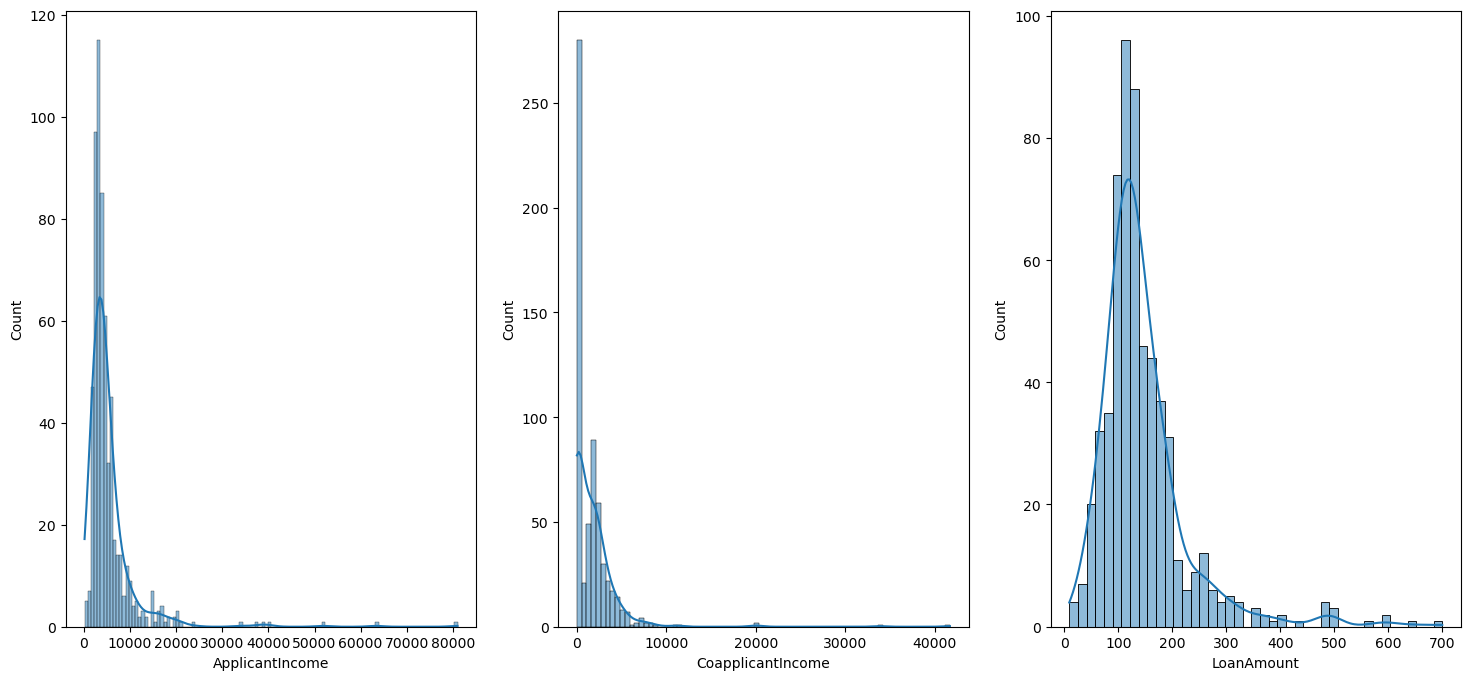

In [39]:
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(1,3,1)
sns.histplot(df.ApplicantIncome,kde=True)
plt.subplot(1,3,2)
sns.histplot(df.CoapplicantIncome,kde=True)
plt.subplot(1,3,3)
sns.histplot(df.LoanAmount,kde=True)



In [40]:
df[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

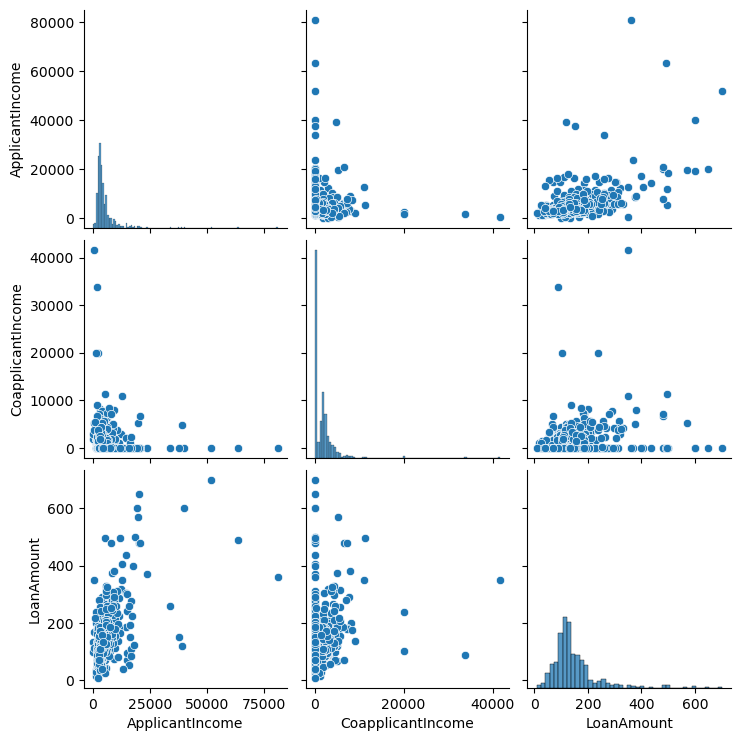

In [41]:
sns.pairplot(df[continous])
plt.show()

<Axes: >

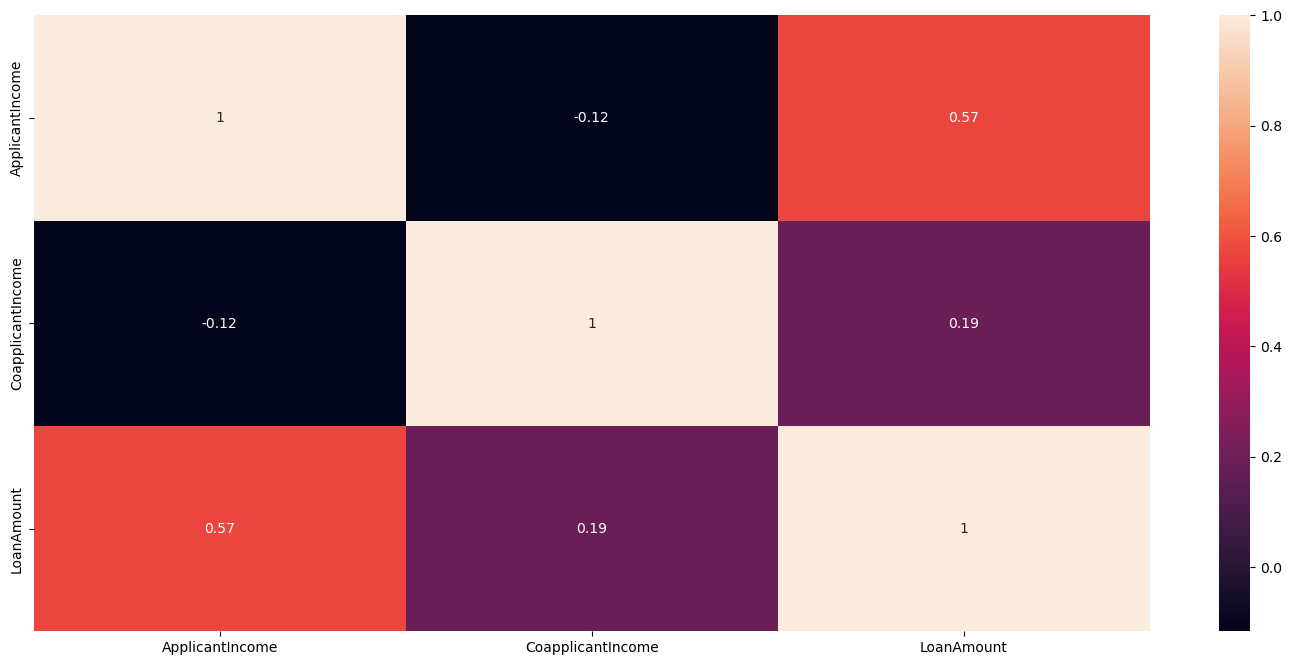

In [42]:
sns.heatmap(df[continous].corr(),annot=True)

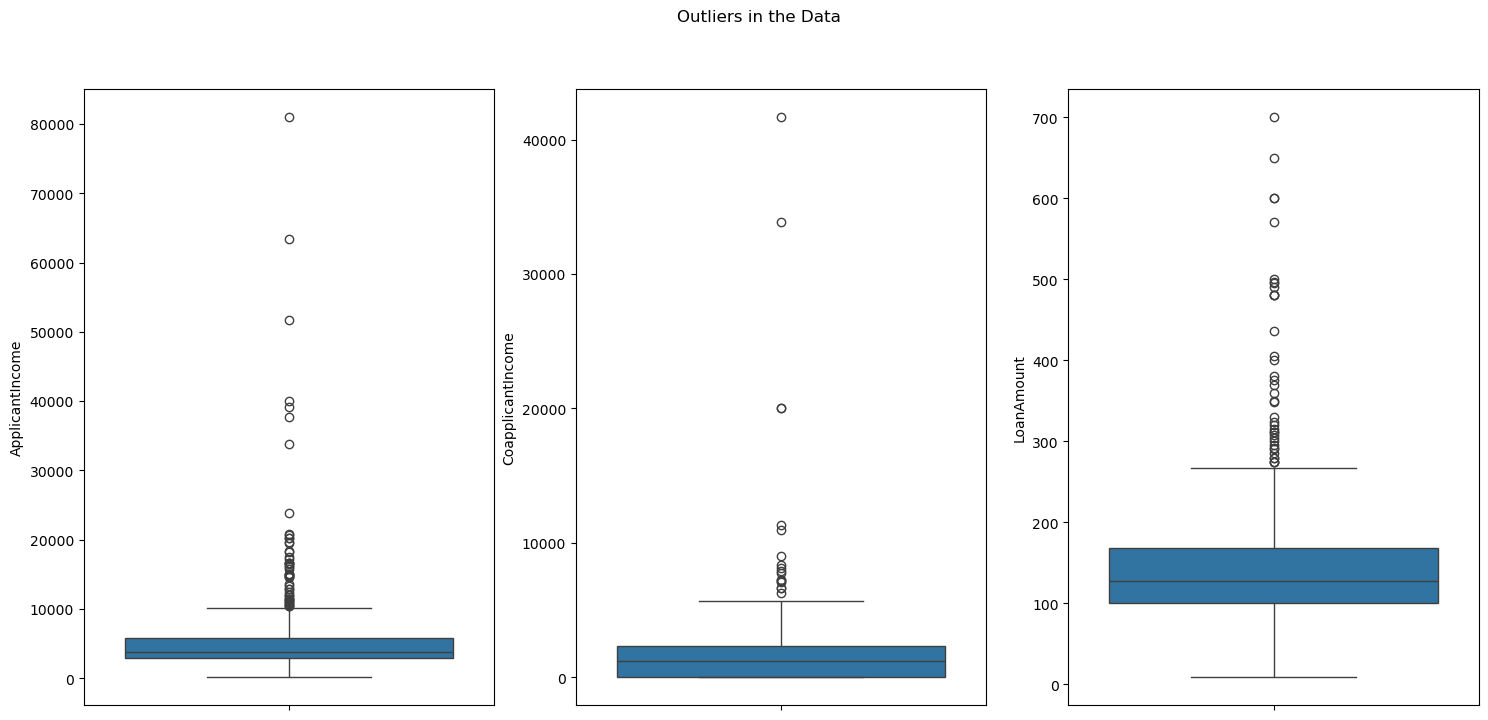

In [43]:
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(1,3,1)
sns.boxplot(df.ApplicantIncome)
plt.subplot(1,3,2)
sns.boxplot(df.CoapplicantIncome)
plt.subplot(1,3,3)
sns.boxplot(df.LoanAmount)
plt.suptitle('Outliers in the Data')
plt.show()

#for Categorical Value

In [44]:
df[discrete_categorical].describe() #top is mode

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


<Axes: xlabel='count', ylabel='Loan_Status'>

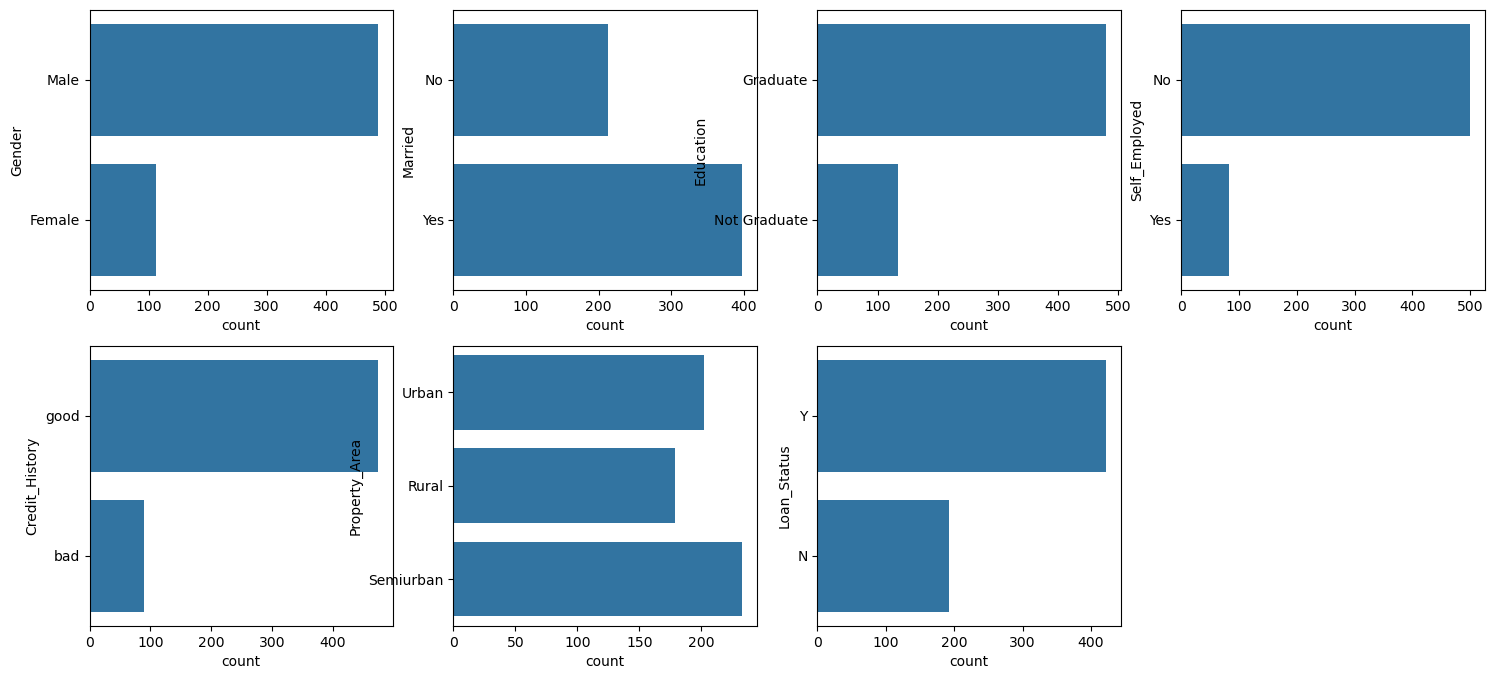

In [45]:
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,1)
sns.countplot(df.Gender)
plt.subplot(2,4,2)
sns.countplot(df.Married)
plt.subplot(2,4,3)
sns.countplot(df.Education)
plt.subplot(2,4,4)
sns.countplot(df.Self_Employed)
plt.subplot(2,4,5)
sns.countplot(df.Credit_History)
plt.subplot(2,4,6)
sns.countplot(df.Property_Area)
plt.subplot(2,4,7)
sns.countplot(df.Loan_Status)


##Data Preparation

In [46]:
df["Income"] = df.ApplicantIncome+df.CoapplicantIncome
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [47]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,good,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,good,Urban,Y,6000.0


In [48]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [49]:
df['Dependents']=df['Dependents'].replace({3:'3'})

In [50]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [51]:
df['Dependents'].isnull().sum()

15

In [52]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [53]:
df.isnull().sum()/len(df)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [54]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [55]:
df = df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

In [56]:
df['Dependents']=df['Dependents'].fillna(0)

In [57]:
df.shape

(529, 11)

In [58]:
#categorical columns are fill the null values by using mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [59]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

#Encoding

In [60]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Married']=df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype('int')
df['Credit_History']=df['Credit_History'].map({'good':1,'bad':0}).astype('int')
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [61]:
#Data Type Conversion

In [62]:
df['Dependents']=df['Dependents'].replace({'3+':3})

In [63]:
df.Dependents.unique()

array(['1', '0', '2', 3, 0], dtype=object)

In [64]:
df['Dependents']=df['Dependents'].astype('int')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')

In [65]:
#Data Transformation

In [66]:
df[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [67]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:
#lets apply boxcox transformation to remove skewness,(log transformation & root transformation)
from scipy.stats import boxcox
df['Income'],a=boxcox(df['Income'])
df['LoanAmount'],c=boxcox(df['LoanAmount'])

In [69]:
df[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [70]:
df['Loan_Amount_Term']=df['Loan_Amount_Term']/12

In [71]:
df.head()


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481931,30.0,1,2,1,1.868932


#only concentrate continuous variable for scaling after train test split
# from sklearn.preprocessing import StandatrdScaler
#sc=StandatrdScaler()
#X_train.iloc[:,[5,9]]=sc.fit_transform(X_train.iloc[:,[5,9]])
#X_test.iloc[:,[5,9]]=sc.fit_transform(X_test.iloc[:,[5,9]])

#X.info()

In [72]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [73]:
Train=[]
Test=[]
CV=[]
for i in range(0,101):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    from sklearn.linear_model import LogisticRegression
    log_default = LogisticRegression()
    log_default.fit(X_train,y_train)

    ypred_train = log_default.predict(X_train)
    ypred_test = log_default.predict(X_test)

    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default, X_train, y_train, cv=5, scoring="accuracy").mean())

em=pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})
gm=em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("best random state number:",rs)

best random state number: 70


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=rs)

#Modeling

#1.Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train = log_default.predict(X_train)
ypred_test = log_default.predict(X_test)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(log_model,X_train, y_train, cv=5, scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.8226950354609929
Cross Validation Score: 0.8227731092436976
Test accuracy: 0.7830188679245284


#2.KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.7541371158392435
Cross Validation Score: 0.7375910364145659
Test accuracy: 0.7075471698113207


In [77]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [78]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV
svm_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

svm_model = svm_grid.best_estimator_

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))


Train accuracy: 0.8226950354609929
Cross Validation Score: 0.8227731092436976
Test accuracy: 0.7830188679245284


In [79]:
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

4.Decision Tree Classifier

In [84]:
#Apply hyper parameter tuning  & identify best model
#using your best model  Idendtify the importance of each model

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],"max_depth":list(range(1,16))}


from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt = dt_grid.best_estimator_
dt_fi = dt.feature_importances_
#Idendtify the features where the feature importance value is >0
index = [i for i, x in enumerate(dt_fi) if x >0] #list comprehension what is enumerate (index,value)
# create the new ds with importance feature
X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]
# Train with best model & with importance features
dt.fit(X_train,y_train)

ypred_train = dt.predict(X_train)
ypred_test = dt.predict(X_test)
#evaluate the best model
print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(dt,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.8226950354609929
Cross Validation Score: 0.8227731092436976
Test accuracy: 0.7830188679245284


In [85]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=70)

In [86]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

5.Random Forest

In [87]:
 
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=rs)
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i, x in enumerate(rf_fi) if x >0] #list comprehension what is enumerate (index,value)

X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]
rf.fit(X_train_rf,y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.9905437352245863
Cross Validation Score: 0.8063025210084034
Test accuracy: 0.7641509433962265


In [88]:
rf_grid.best_estimator_

RandomForestClassifier(n_estimators=17, random_state=70)

In [89]:
rf.feature_importances_

array([0.0189563 , 0.02685879, 0.05111087, 0.02403949, 0.02273413,
       0.22373688, 0.05541177, 0.26560248, 0.0616409 , 0.24990839])

6.AdaBoost Classifier

In [90]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=rs)
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index = [i for i, x in enumerate(ab_fi) if x >0] #list comprehension what is enumerate (index,value)

X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]
ab.fit(X_train_ab,y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.83451536643026
Cross Validation Score: 0.8298879551820729
Test accuracy: 0.7641509433962265


7.Gradiant Boost

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=rs)
param_grid = {'n_estimators':list(range(1,51)),'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index = [i for i, x in enumerate(gb_fi) if x >0] #list comprehension what is enumerate (index,value)

X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]
gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.8392434988179669
Cross Validation Score: 0.82515406162465
Test accuracy: 0.7735849056603774


8.XGBoost Classifier

In [95]:
from xgboost import XGBClassifier
estimator = XGBClassifier(random_state=rs)
param_grid = {'n_estimators':[10,20,40,100],'max_depth':[3,4,5],'gama':[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_
xgb_fi = xgb.feature_importances_

index = [i for i, x in enumerate(xgb_fi) if x >0] #list comprehension what is enumerate (index,value)

X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]
xgb.fit(X_train_xgb,y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.8676122931442081
Cross Validation Score: 0.8180672268907564
Test accuracy: 0.7735849056603774
